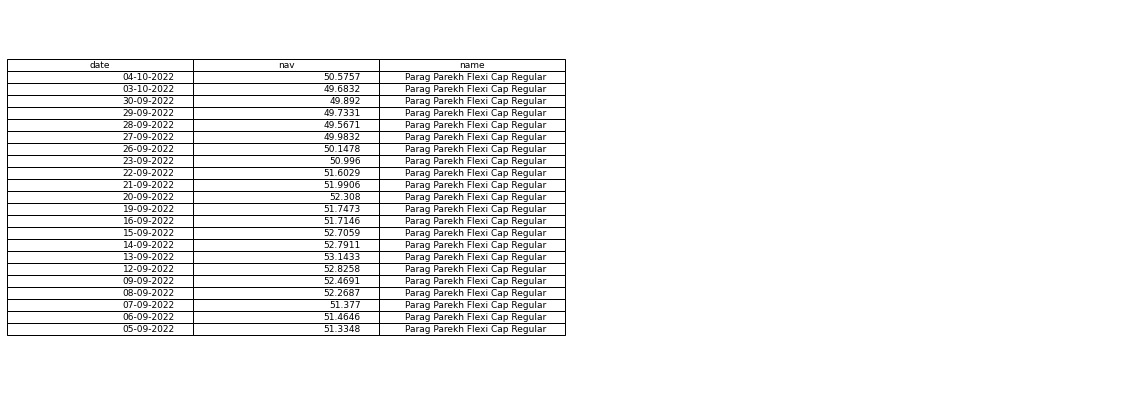

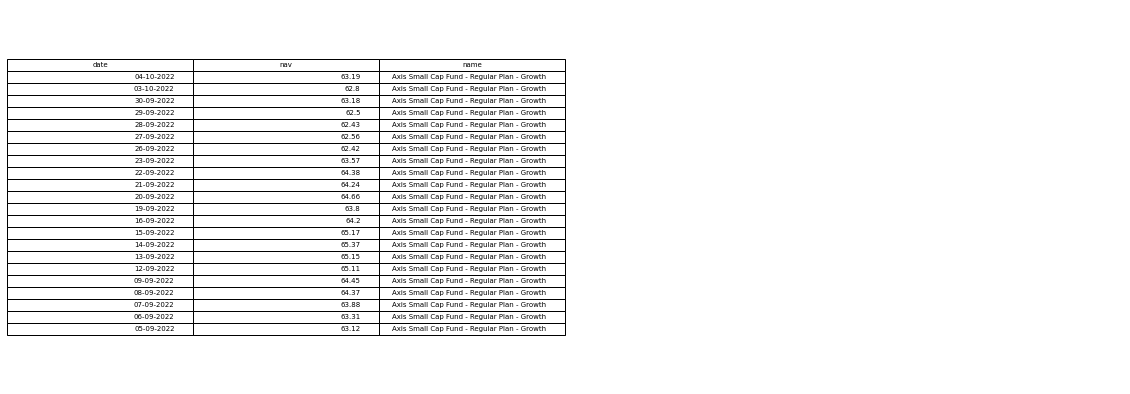

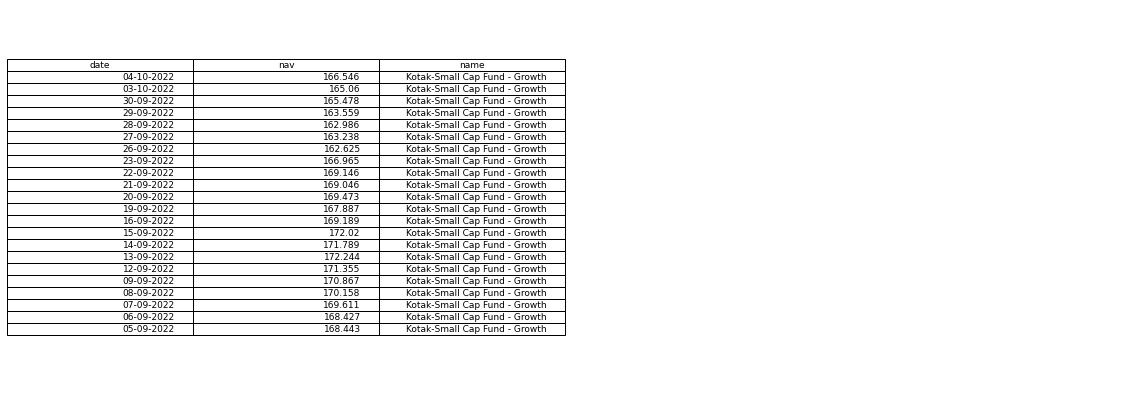

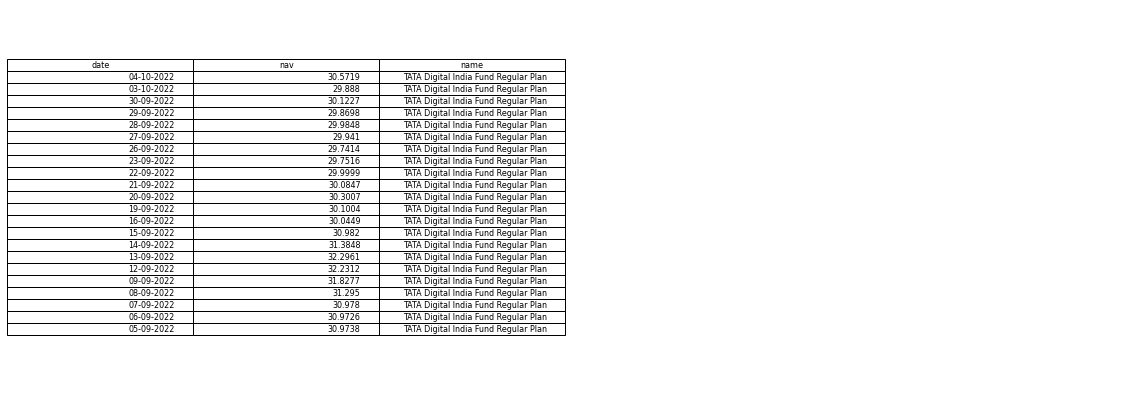

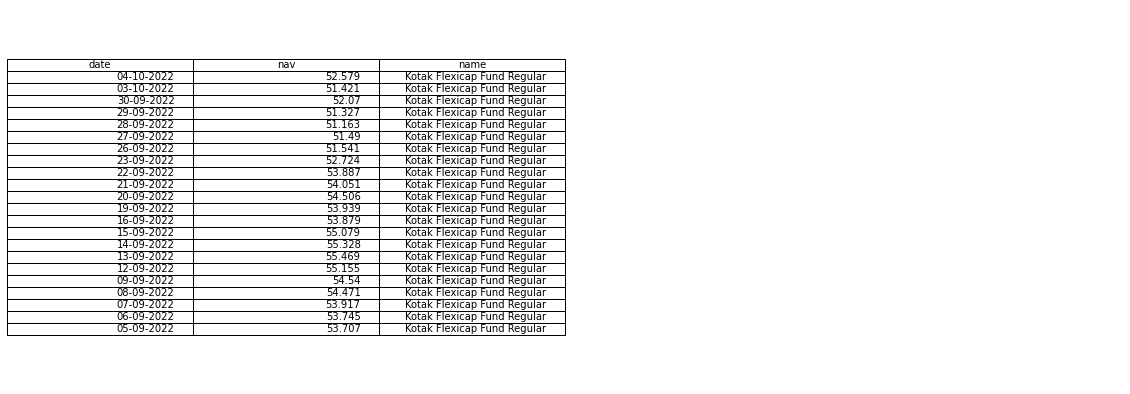

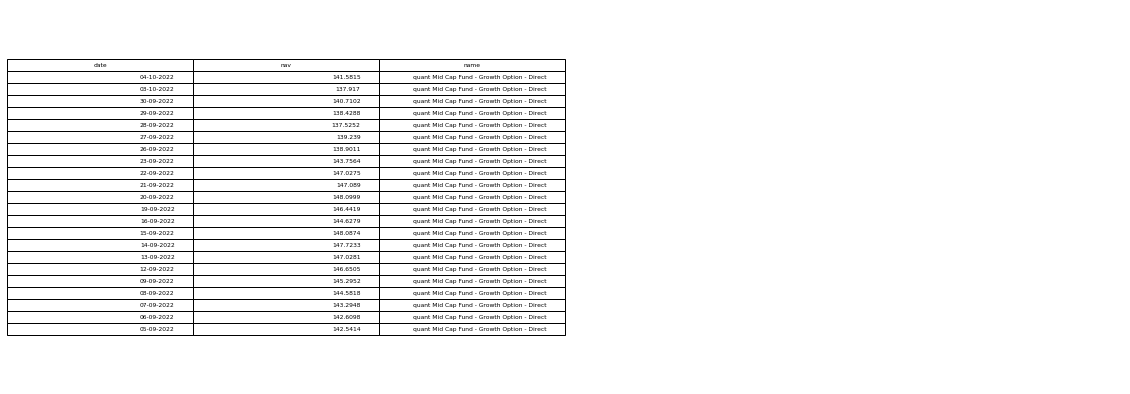

In [5]:
from matplotlib.backends.backend_pdf import PdfPages
import requests
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
AVERAGE_FACTOR = 22


MF_SCHEME_CODE = [
    {"schemecode": 122639, "name": "Parag Parekh Flexi Cap Regular"},
    {"schemecode": 125350, "name": "Axis Small Cap Fund - Regular Plan - Growth"},
    {"schemecode": 102875, "name": "Kotak-Small Cap Fund - Growth"},
    {"schemecode": 135799, "name": "TATA Digital India Fund Regular Plan"},
    {"schemecode": 112090, "name": "Kotak Flexicap Fund Regular"},
    {"schemecode": 120841, "name": "quant Mid Cap Fund - Growth Option - Direct"}
]

def getHistoricalMFNavData(schemeCode):
    url = "https://api.mfapi.in/mf/"+str(schemeCode) 
    response = requests.get(url)
    if response.status_code == requests.codes.ok:
        data = response.json()
        df = pd.DataFrame(data['data'])
        dfToConsider = df.head(AVERAGE_FACTOR)
        return dfToConsider
    else:
        return None


def get_mf_analysis():
    today = date.today()
    pdf = PdfPages(str(today) + "-1.pdf")
    for x in MF_SCHEME_CODE:
        dfC = getHistoricalMFNavData(x["schemecode"])
        dfC['nav'] = dfC['nav'].astype(float)
        dfC['name'] = x['name']
        fig, ax =plt.subplots(figsize=(10,7))
        ax.axis('tight')
        ax.axis('off')
        the_table = ax.table(cellText=dfC.values,colLabels=dfC.columns,loc='left')
        pdf.savefig(fig, bbox_inches='tight')
    pdf.close()    
        
get_mf_analysis()

In [3]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# create a PdfPages object
pdf = PdfPages('out.pdf')

# define here the dimension of your figure
fig = plt.figure()

for color in ['blue', 'red']:
    plt.plot(range(10), range(10), color)

    # save the current figure
    pdf.savefig(fig)

    # destroy the current figure
    # saves memory as opposed to create a new figure
    plt.clf()

# remember to close the object to ensure writing multiple plots
pdf.close()

<Figure size 432x288 with 0 Axes>